## NEURAL NETWORKS : TWO INPUT & TWO HIDDEN LAYERS

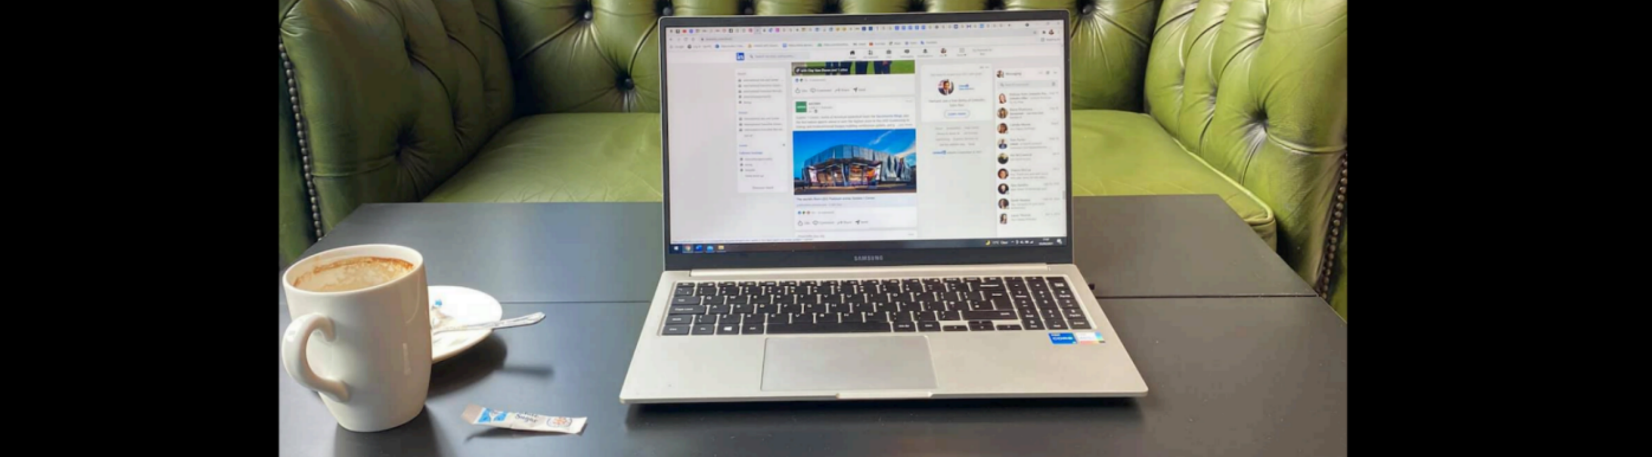

### HEMANT THAPA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import statistics as st

The neural network comprises two layers: a hidden layer and an output layer. The purpose of this network is to execute a feedforward pass for a specific input, namely $[2, 3]$.

In the hidden layer, two neurons ($h_1$ and $h_2\$ are employed, each with weights set to [0, 1] and biases initialized to 0. The activation function used throughout the network is the sigmoid function.

The output layer consists of a single neuron ($o_1$), connected to the hidden layer with weights [0, 1] and a bias of 0. The sigmoid activation function is also applied in the output layer.

Sigmoid activation function and implements the neural network. It specifies weights, biases, and activation functions for each layer. The network is then fed with the input $[2, 3]$, and the resulting output is printed.


In [2]:
#declaring sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

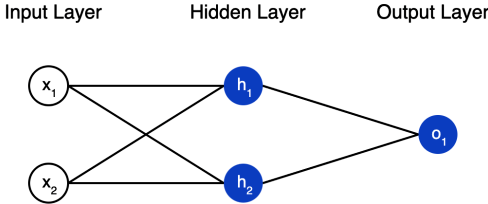

Feedforward

This network has 2 inputs, a hidden layer with 2 neurons ($h_1$ and $h_2$), and an output layer with 1 neuron ($o_1$). Notice that the inputs for $o_1$ are the outputs from $h_1$ and $h_2$ - that’s what makes this a network.

A hidden layer is any layer between the input (first) layer and output (last) layer. There can be multiple hidden layers!


In [3]:
#input, x1 = 2 and x2 = 3
input_data = np.array([2, 3])

Let’s use the network pictured above and assume all neurons have the same weights ($w = [0, 1]$), the same bias ($b = 0$), and the same sigmoid activation function. Let $h_1$, $h_2$, $o_1$ denote the outputs of the neurons they represent.

What happens if we pass in the input $x = [2, 3]$?


\begin{align*}
h_1 &= h_2 = \sigma(w \cdot x + b) \\
   &= \sigma((0 \cdot 2) + (1 \cdot 3) + 0) \\
   &= \sigma(3) \\
   &= 0.95
\end{align*}



\begin{align*}
o_1 &= \sigma(w \cdot [h_1, h_2] + b) \\
    &= \sigma((0 \cdot h_1) + (1 \cdot h_2) + 0) \\
    &= \sigma(0.9526) \\
    &= 0.72
\end{align*}


In [4]:
def neural_network(input_data):
    #weights for the hidden layer
    w_h = np.array([0, 1]) 
    #weights for the output layer
    w_o = np.array([0, 1])  

    #bias for the hidden layer
    b_h = 0  
    #bias for the output layer
    b_o = 0 

    #hidden layer outputs
    h1 = sigmoid(np.dot(w_h, input_data) + b_h)
    h2 = sigmoid(np.dot(w_h, input_data) + b_h)

    #output layer output
    o1 = sigmoid(np.dot(w_o, np.array([h1, h2])) + b_o)

    return o1, h1 , h2

In [5]:
#output of the neural network, calling function
output = neural_network(input_data)

In [6]:
print(f"The Hidden Layer one of the neural network for input [2, 3] is: {output[1]:.2f}")

The Hidden Layer one of the neural network for input [2, 3] is: 0.95


In [7]:
print(f"The Hidden Layer Two of the neural network for input [2, 3] is: {output[2]:.2f}")

The Hidden Layer Two of the neural network for input [2, 3] is: 0.95


In [8]:
print(f"The output of the neural network for input [2, 3] is: {output[0]:.4f}")

The output of the neural network for input [2, 3] is: 0.7216


A neural network can have any number of layers with any number of neurons in those layers. The fundamental idea remains constant: feed the inputs forward through the neurons to obtain the outputs.

### Keras for Validation 

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
#input
input_data = np.array([2, 3])

In [11]:
#neural network using Keras
model = Sequential()

In [12]:
#hidden layer with 2 neurons and sigmoid activation
model.add(Dense(units=2, input_dim=2, activation='sigmoid', use_bias=True,
                kernel_initializer='zeros', bias_initializer='zeros'))

In [13]:
#output layer with 1 neuron and sigmoid activation
model.add(Dense(units=1, activation='sigmoid', use_bias=True,
                kernel_initializer='zeros', bias_initializer='zeros'))

#### Hidden Layer (Layer 1) Initialisation

Let's denote:
- $W_h$ as the weight matrix for the hidden layer.
- $b_h$ as the bias vector for the hidden layer.
- $h_1$ and $h_2$ as the outputs of the two neurons in the hidden layer.

The initialization is as follows:

$$
W_h = \begin{bmatrix}
    0 & 1 \\
    0 & 1
\end{bmatrix}
$$

$$
b_h = \begin{bmatrix}
    0 \\
    0
\end{bmatrix}
$$

Now, let's calculate the hidden layer outputs $h_1$ and $h_2$ for a given input $[2, 3]$:

$$
h_1 = \sigma(0 \cdot 2 + 1 \cdot 3 + 0) = \sigma(3) \approx 0.95
$$

$$
h_2 = \sigma(0 \cdot 2 + 1 \cdot 3 + 0) = \sigma(3) \approx 0.95
$$


In [14]:
#manually set the weights and biases to match the original implementation
model.layers[0].set_weights([np.array([[0, 1], [0, 1]]), np.array([0, 0])])
model.layers[1].set_weights([np.array([[0], [1]]), np.array([0])])

In [15]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Output Layer (Layer 2) Initialization

Let's denote:
- $W_o$ as the weight matrix for the output layer.
- $b_o$ as the bias vector for the output layer.
- $o_1$ as the output of the output layer.

The initialization is as follows:

$$
W_o = \begin{bmatrix}
    0 \\
    1
\end{bmatrix}
$$

$$
b_o = \begin{bmatrix}
    0
\end{bmatrix}
$$

Now, let's calculate the output $o_1$ for the given hidden layer outputs $h_1$ and $h_2$:

$$
o_1 = \sigma(0 \cdot h_1 + 1 \cdot h_2 + 0) = \sigma(0.9526) \approx 0.72
$$

This manual initialization is done to mimic the weights and biases used in a specific example, ensuring that the Keras model produces similar results when fed the same input.


In [16]:
#predictions
output_keras = model.predict(np.array([input_data]))

1/1 [==============================] - 0s 182ms/step


In [17]:
print("The output of the neural network for input [2, 3] using Keras is: {:.4f}".format(output_keras[0][0]))

The output of the neural network for input [2, 3] using Keras is: 0.7297


### References:

For more examples and documentation, [Keras Examples](https://keras.io/examples/)